In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

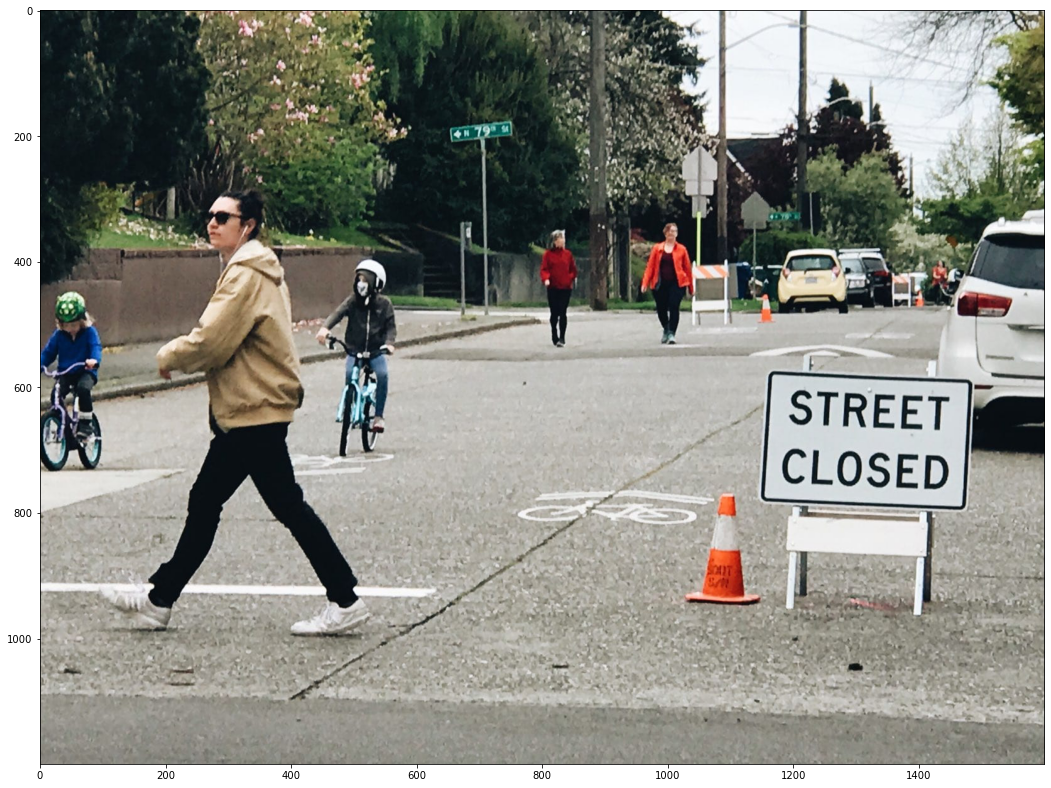

In [22]:
img=plt.imread('C://Users//antoz//Documents//MATLAB//streets.jpg')
height , width ,_=img.shape
colors = np.random.randint(0, 255, (80, 3))
black_image = np.zeros((height, width, 3), np.uint8)
black_image[:] = (100, 100, 0)
plt.figure(figsize=(18 , 18))
plt.imshow(img)

In [17]:
net = cv2.dnn.readNetFromTensorflow("frozen_inference_graph_coco.pb",
                                    "mask_rcnn_inception_v2_coco_2018_01_28.pbtxt")

In [18]:
# Detect objects
blob = cv2.dnn.blobFromImage(img, swapRB=True)
net.setInput(blob)
boxes, masks = net.forward(["detection_out_final", "detection_masks"])
detection_count = boxes.shape[2]

In [19]:
for i in range(detection_count):
    box = boxes[0, 0, i]
    class_id = box[1]
    score = box[2]
    if score < 0.5:
        continue

    # Get box Coordinates
    x = int(box[3] * width)
    y = int(box[4] * height)
    x2 = int(box[5] * width)
    y2 = int(box[6] * height)

    roi = black_image[y: y2, x: x2]
    
    roi_height, roi_width, _ = roi.shape

    # Get the mask
    mask = masks[i, int(class_id)]
    mask = cv2.resize(mask, (roi_width, roi_height))
    _, mask = cv2.threshold(mask, 0.5, 255, cv2.THRESH_BINARY)

    cv2.rectangle(img, (x, y), (x2, y2), (255, 0, 0), 3)

    # Get mask coordinates
    contours, _ = cv2.findContours(np.array(mask, np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    color = colors[int(class_id)]
    for cnt in contours:
        cv2.fillPoly(roi, [cnt], (int(color[0]), int(color[1]), int(color[2])))


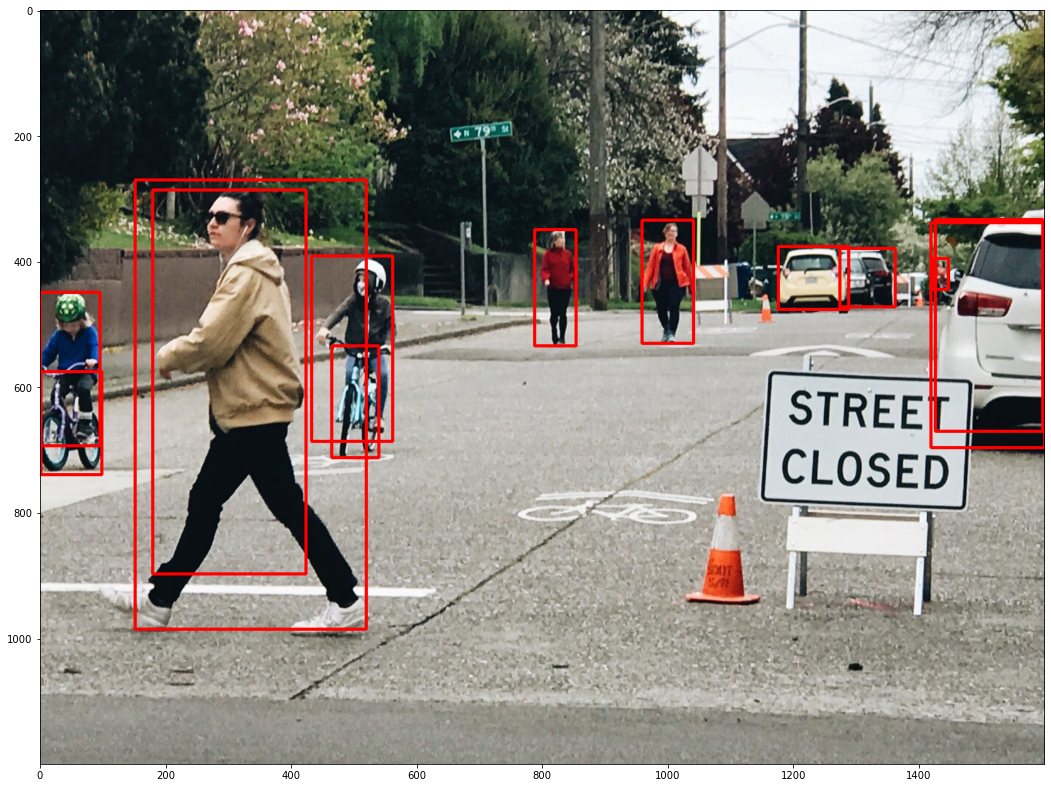

In [20]:
plt.figure(figsize=(18 , 18))
plt.imshow(img )

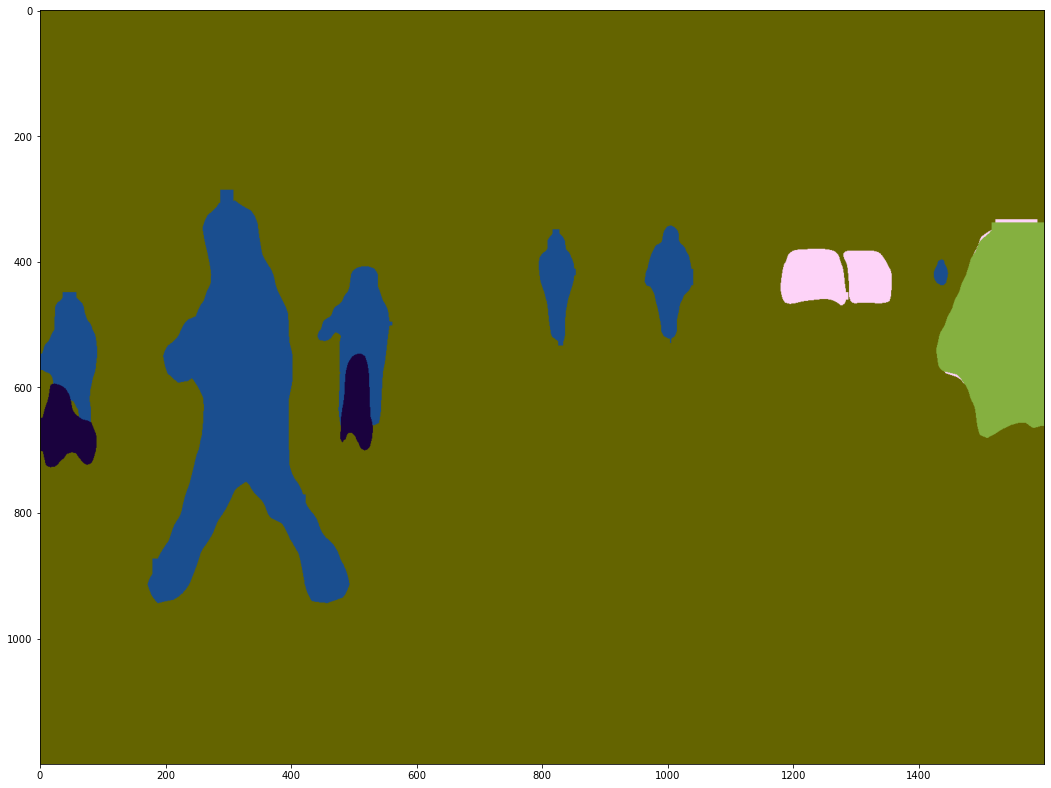

In [21]:
plt.figure(figsize=(18 , 18))
plt.imshow(black_image )